In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors
import seaborn as sns
import missingno as msno
from scipy.stats import norm
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Loading the Data

In [2]:
train = pd.read_csv('train_data.csv')
test = pd.read_csv('test_data.csv')
target = 'contest-tmp2m-14d__tmp2m'

# Train Data

In [3]:
train.head()

,index,lat,lon,startdate,contest-pevpr-sfc-gauss-14d__pevpr,nmme0-tmp2m-34w__cancm30,nmme0-tmp2m-34w__cancm40,nmme0-tmp2m-34w__ccsm30,nmme0-tmp2m-34w__ccsm40,nmme0-tmp2m-34w__cfsv20,...,wind-vwnd-925-2010-11,wind-vwnd-925-2010-12,wind-vwnd-925-2010-13,wind-vwnd-925-2010-14,wind-vwnd-925-2010-15,wind-vwnd-925-2010-16,wind-vwnd-925-2010-17,wind-vwnd-925-2010-18,wind-vwnd-925-2010-19,wind-vwnd-925-2010-20
0,0,0.0,0.833333,9/1/14,237.00,29.02,31.64,29.57,30.73,29.71,...,-27.68,-37.21,8.32,9.56,-2.03,48.13,28.09,-13.50,11.90,4.58
1,1,0.0,0.833333,9/2/14,228.90,29.02,31.64,29.57,30.73,29.71,...,-21.13,-36.57,8.77,21.17,4.44,48.60,27.41,-23.77,15.44,3.42
2,2,0.0,0.833333,9/3/14,220.69,29.02,31.64,29.57,30.73,29.71,...,-10.72,-34.16,6.99,32.16,5.01,48.53,19.21,-33.16,15.11,4.82
3,3,0.0,0.833333,9/4/14,225.28,29.02,31.64,29.57,30.73,29.71,...,0.33,-31.04,6.17,39.66,-1.41,50.59,8.29,-37.22,18.24,9.74
4,4,0.0,0.833333,9/5/14,237.24,29.02,31.64,29.57,30.73,29.71,...,9.83,-31.80,7.47,38.62,-5.21,54.73,-2.58,-42.30,21.91,10.95


# Test Data

In [4]:
test.head()

,index,lat,lon,startdate,contest-pevpr-sfc-gauss-14d__pevpr,nmme0-tmp2m-34w__cancm30,nmme0-tmp2m-34w__cancm40,nmme0-tmp2m-34w__ccsm30,nmme0-tmp2m-34w__ccsm40,nmme0-tmp2m-34w__cfsv20,...,wind-vwnd-925-2010-11,wind-vwnd-925-2010-12,wind-vwnd-925-2010-13,wind-vwnd-925-2010-14,wind-vwnd-925-2010-15,wind-vwnd-925-2010-16,wind-vwnd-925-2010-17,wind-vwnd-925-2010-18,wind-vwnd-925-2010-19,wind-vwnd-925-2010-20
0,375734,0.0,0.833333,11/1/22,339.88,30.88,30.92,29.17,31.02,29.47,...,-19.28,-39.77,-29.25,40.88,-8.31,14.91,-24.62,31.05,-23.69,6.27
1,375735,0.0,0.833333,11/2/22,334.63,30.88,30.92,29.17,31.02,29.47,...,-19.58,-43.14,-28.62,45.37,-5.42,16.97,-23.94,28.84,-20.61,14.16
2,375736,0.0,0.833333,11/3/22,337.83,30.88,30.92,29.17,31.02,29.47,...,-13.73,-44.22,-27.67,49.76,-1.31,21.44,-19.06,26.85,-16.78,13.42
3,375737,0.0,0.833333,11/4/22,345.81,30.88,30.92,29.17,31.02,29.47,...,-7.97,-49.47,-19.32,52.62,-0.44,21.65,-23.12,23.70,-18.62,10.69
4,375738,0.0,0.833333,11/5/22,357.39,30.88,30.92,29.17,31.02,29.47,...,-0.80,-56.07,-9.89,51.23,-7.57,19.86,-30.56,20.66,-25.08,19.64


In [5]:
train.describe()

,index,lat,lon,contest-pevpr-sfc-gauss-14d__pevpr,nmme0-tmp2m-34w__cancm30,nmme0-tmp2m-34w__cancm40,nmme0-tmp2m-34w__ccsm30,nmme0-tmp2m-34w__ccsm40,nmme0-tmp2m-34w__cfsv20,nmme0-tmp2m-34w__gfdlflora0,...,wind-vwnd-925-2010-11,wind-vwnd-925-2010-12,wind-vwnd-925-2010-13,wind-vwnd-925-2010-14,wind-vwnd-925-2010-15,wind-vwnd-925-2010-16,wind-vwnd-925-2010-17,wind-vwnd-925-2010-18,wind-vwnd-925-2010-19,wind-vwnd-925-2010-20
count,375734.000000,375734.000000,375734.000000,375734.000000,375734.000000,375734.000000,359800.000000,375734.000000,375734.000000,375734.000000,...,375734.000000,375734.000000,375734.000000,375734.000000,375734.000000,375734.000000,375734.000000,375734.000000,375734.000000,375734.000000
mean,187866.500000,0.592766,0.517964,276.744064,10.801682,12.726739,10.099323,11.638229,10.733886,11.772646,...,-1.209959,-8.109918,6.800684,19.251970,-17.697565,-9.846867,-6.231860,16.014364,10.489945,11.296334
std,108465.207359,0.251744,0.272059,198.085182,10.952417,11.073553,10.339626,10.574276,9.403434,10.689967,...,37.317333,36.201507,38.458878,25.288526,31.946748,34.164678,27.050356,25.847455,25.070435,25.113214
min,0.000000,0.000000,0.000000,-2.310000,-14.960000,-14.970000,-11.720000,-17.560000,-13.720000,-13.330000,...,-94.570000,-89.940000,-64.870000,-39.280000,-100.560000,-106.080000,-93.980000,-52.610000,-66.110000,-57.610000
25%,93933.250000,0.409091,0.300000,104.062500,1.550000,3.650000,1.640000,3.080000,3.390000,2.970000,...,-27.200000,-33.350000,-19.650000,1.960000,-40.030000,-32.170000,-20.170000,-0.360000,-6.790000,-5.570000
50%,187866.500000,0.590909,0.533333,250.320000,9.950000,11.890000,9.490000,11.600000,10.890000,11.280000,...,-3.200000,-9.390000,2.330000,20.050000,-16.710000,-8.560000,-6.030000,18.650000,11.860000,11.650000
75%,281799.750000,0.818182,0.766667,420.010000,20.230000,22.110000,18.740000,20.360000,18.330000,20.300000,...,24.940000,17.960000,28.660000,35.090000,4.390000,10.500000,11.630000,31.210000,29.040000,29.180000
max,375733.000000,1.000000,1.000000,1185.140000,36.080000,36.030000,33.390000,34.640000,35.750000,38.350000,...,113.920000,96.550000,106.420000,91.760000,56.550000,83.890000,64.850000,90.390000,76.890000,88.660000


In [6]:
train.isnull().count()

index                                 375734
lat                                   375734
lon                                   375734
startdate                             375734
contest-pevpr-sfc-gauss-14d__pevpr    375734
                                       ...  
wind-vwnd-925-2010-16                 375734
wind-vwnd-925-2010-17                 375734
wind-vwnd-925-2010-18                 375734
wind-vwnd-925-2010-19                 375734
wind-vwnd-925-2010-20                 375734
Length: 246, dtype: int64

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375734 entries, 0 to 375733
Columns: 246 entries, index to wind-vwnd-925-2010-20
dtypes: float64(240), int64(4), object(2)
memory usage: 705.2+ MB


In [8]:
train.shape

(375734, 246)

In [9]:
test.describe()

,index,lat,lon,contest-pevpr-sfc-gauss-14d__pevpr,nmme0-tmp2m-34w__cancm30,nmme0-tmp2m-34w__cancm40,nmme0-tmp2m-34w__ccsm30,nmme0-tmp2m-34w__ccsm40,nmme0-tmp2m-34w__cfsv20,nmme0-tmp2m-34w__gfdlflora0,...,wind-vwnd-925-2010-11,wind-vwnd-925-2010-12,wind-vwnd-925-2010-13,wind-vwnd-925-2010-14,wind-vwnd-925-2010-15,wind-vwnd-925-2010-16,wind-vwnd-925-2010-17,wind-vwnd-925-2010-18,wind-vwnd-925-2010-19,wind-vwnd-925-2010-20
count,31354.000000,31354.000000,31354.000000,31354.000000,31354.000000,31354.000000,31354.000000,31354.000000,31354.000000,31354.000000,...,31354.000000,31354.000000,31354.000000,31354.000000,31354.000000,31354.000000,31354.000000,31354.000000,31354.000000,31354.000000
mean,391410.500000,0.592766,0.517964,299.244395,19.363234,21.195801,19.204389,20.140415,18.261659,20.396613,...,22.030820,-34.379016,25.485902,36.913279,-21.290328,10.448689,-12.676885,8.211967,-11.478033,21.083770
std,9051.264507,0.251748,0.272063,117.029504,7.310349,7.151861,7.146665,6.169318,5.539982,7.087798,...,30.914333,24.479350,30.720523,17.083142,22.336810,8.557387,29.438632,29.897845,18.660838,16.841297
min,375734.000000,0.000000,0.000000,32.820000,1.550000,2.900000,1.170000,3.530000,1.840000,0.080000,...,-19.900000,-76.450000,-29.250000,6.500000,-59.540000,-5.450000,-66.770000,-32.150000,-53.690000,-16.560000
25%,383572.250000,0.409091,0.300000,215.962500,14.060000,16.140000,14.440000,15.840000,14.660000,15.540000,...,2.220000,-56.070000,3.630000,19.570000,-39.340000,4.720000,-30.630000,-18.360000,-23.150000,13.420000
50%,391410.500000,0.590909,0.533333,292.915000,19.940000,21.720000,19.325000,20.150000,18.210000,20.340000,...,14.700000,-31.070000,22.740000,37.090000,-21.420000,10.660000,-22.640000,0.150000,-13.950000,21.090000
75%,399248.750000,0.818182,0.766667,371.330000,24.610000,26.810000,24.760000,24.890000,22.180000,25.730000,...,34.300000,-15.510000,44.690000,49.660000,-0.790000,17.090000,14.420000,28.840000,-0.470000,32.410000
max,407087.000000,1.000000,1.000000,740.170000,36.080000,36.030000,32.970000,33.910000,35.310000,37.420000,...,116.770000,25.330000,79.610000,71.270000,14.150000,29.000000,33.350000,74.130000,28.270000,51.450000


In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31354 entries, 0 to 31353
Columns: 245 entries, index to wind-vwnd-925-2010-20
dtypes: float64(241), int64(2), object(2)
memory usage: 58.6+ MB


In [11]:
test.shape

(31354, 245)

## Target Variable 'contest-tmp2m-14d__tmp2m' is not present in Test Data

## All other variables are present in train as well as test

### Checking the data points

### Total Data Instances are 375734

### But after calculating from minimum and maximumthere are only 731 Data Instances


### Converting index to datetime for test data

### Total Data Instances are 31354

### But after calculating from minimum and maximumthere are only 61Data Instances

In [14]:
train['loc'] = train['lat'].astype(str)+','+train['lon'].astype(str)
test['loc'] = test['lat'].astype(str)+','+test['lon'].astype(str)

In [15]:
train['loc'].nunique()

514

In [16]:
test['loc'].nunique()

514

In [17]:
data_loc = train.groupby(['loc'])['startdate'].count()
data_loc

loc
0.0,0.8333333333333334                   731
0.0,0.8666666666666667                   731
0.0454545454545454,0.8333333333333334    731
0.0454545454545454,0.8666666666666667    731
0.0454545454545454,0.9                   731
                                        ... 
1.0,0.7333333333333333                   731
1.0,0.7666666666666667                   731
1.0,0.8                                  731
1.0,0.8333333333333334                   731
1.0,0.8666666666666667                   731
Name: startdate, Length: 514, dtype: int64

In [18]:
data_loc = test.groupby(['loc'])['startdate'].count()
data_loc

loc
0.0,0.8333333333333334                   61
0.0,0.8666666666666667                   61
0.0454545454545454,0.8333333333333334    61
0.0454545454545454,0.8666666666666667    61
0.0454545454545454,0.9                   61
                                         ..
1.0,0.7333333333333333                   61
1.0,0.7666666666666667                   61
1.0,0.8                                  61
1.0,0.8333333333333334                   61
1.0,0.8666666666666667                   61
Name: startdate, Length: 514, dtype: int64

#### Simply it is continuous daily data for 245 variables. First thought, this is a complex dataset. Maximum Timestamp is ('2014-09-01 00:00:00'), and the minimum Timestamp is ('2016-08-31 00:00:00')). It should be 731 Data instances. But we have 375734 data instances. It seems the dataset stacked several datasets on each other.

In [21]:
null_counts=train.isnull().sum()
data_null = null_counts[null_counts > 0]
data_null

nmme0-tmp2m-34w__ccsm30    15934
nmme-tmp2m-56w__ccsm3      10280
nmme-prate-34w__ccsm3       8738
nmme0-prate-56w__ccsm30    15934
nmme0-prate-34w__ccsm30    15934
nmme-prate-56w__ccsm3      10280
nmme-tmp2m-34w__ccsm3       8738
ccsm30                     15934
dtype: int64

<AxesSubplot:>

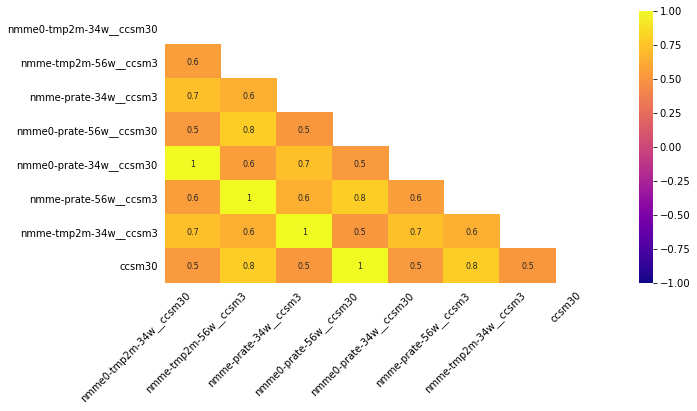

In [22]:
msno.heatmap(train, cmap="plasma", figsize=(10,5), fontsize=10)

In [23]:
nulllist = ['nmme0-tmp2m-34w__ccsm30','nmme0-prate-56w__ccsm30', 'nmme0-prate-34w__ccsm30', 'ccsm30',
             'nmme-tmp2m-56w__ccsm3','nmme-prate-56w__ccsm3', 'nmme-prate-34w__ccsm3', 'nmme-tmp2m-34w__ccsm3']

In [24]:
nulllists = test.isnull().sum()
nulllists[null_counts > 0]

nmme0-tmp2m-34w__ccsm30    0
nmme-tmp2m-56w__ccsm3      0
nmme-prate-34w__ccsm3      0
nmme0-prate-56w__ccsm30    0
nmme0-prate-34w__ccsm30    0
nmme-prate-56w__ccsm3      0
nmme-tmp2m-34w__ccsm3      0
ccsm30                     0
dtype: int64

<AxesSubplot:>

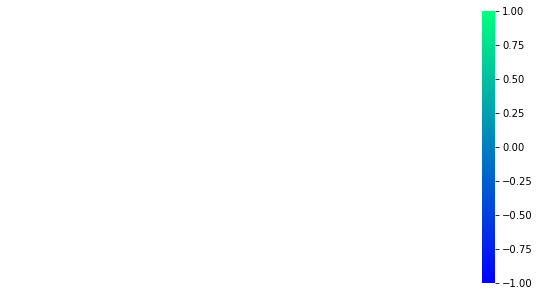

In [25]:
msno.heatmap(test, cmap="winter", figsize=(10,5), fontsize=10)

### There is no null value in test data

# Filling up the null values with forward fills

In [26]:
train.fillna(method = 'ffill' , inplace = True)

<AxesSubplot:>

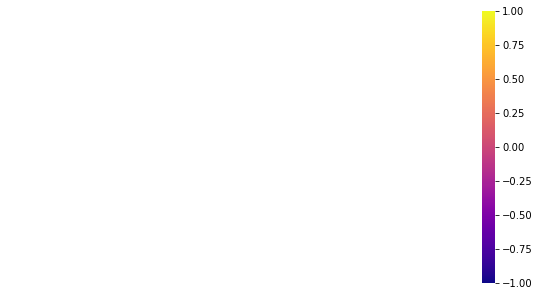

In [27]:
msno.heatmap(train, cmap="plasma", figsize=(10,5), fontsize=10)

# We have a target variable contest-tmp2m-14d__tmp2m


#### the arithmetic mean of the max and min observed temperature over the next 14 days for each location and start date

### Let's Analyze this

In [28]:
train['contest-tmp2m-14d__tmp2m'].describe()

count    375734.000000
mean         11.858568
std           9.867901
min         -20.358963
25%           4.818231
50%          12.285770
75%          19.441170
max          37.238782
Name: contest-tmp2m-14d__tmp2m, dtype: float64

### Distribution Plot of the Target Variable

Text(0.5, 1.0, 'Histogram of contest-tmp2m-14d__tmp2m')

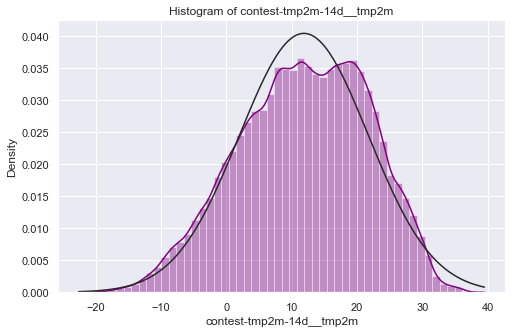

In [33]:
plt.figure(figsize=(8,5))
sns.set()
sns.distplot(train['contest-tmp2m-14d__tmp2m'] , fit=norm, color="purple")
plt.title("Histogram of contest-tmp2m-14d__tmp2m")

### This distribution is little left-skewed and lighter-tailed compared to normal distribution

In [19]:
train.startdate = pd.to_datetime(train.startdate)
test.startdate = pd.to_datetime(test.startdate)

In [20]:
data_date = train.groupby(['startdate'])['contest-tmp2m-14d__tmp2m'].count()
data_date

startdate
2014-09-01    514
2014-09-02    514
2014-09-03    514
2014-09-04    514
2014-09-05    514
             ... 
2016-08-27    514
2016-08-28    514
2016-08-29    514
2016-08-30    514
2016-08-31    514
Name: contest-tmp2m-14d__tmp2m, Length: 731, dtype: int64

In [21]:
train['Year']= train.startdate.dt.year
train['Month']= train.startdate.dt.month
train

,index,lat,lon,startdate,contest-pevpr-sfc-gauss-14d__pevpr,nmme0-tmp2m-34w__cancm30,nmme0-tmp2m-34w__cancm40,nmme0-tmp2m-34w__ccsm30,nmme0-tmp2m-34w__ccsm40,nmme0-tmp2m-34w__cfsv20,...,wind-vwnd-925-2010-14,wind-vwnd-925-2010-15,wind-vwnd-925-2010-16,wind-vwnd-925-2010-17,wind-vwnd-925-2010-18,wind-vwnd-925-2010-19,wind-vwnd-925-2010-20,loc,Year,Month
0,0,0.0,0.833333,2014-09-01,237.00,29.02,31.64,29.57,30.73,29.71,...,9.56,-2.03,48.13,28.09,-13.50,11.90,4.58,"0.0,0.8333333333333334",2014,9
1,1,0.0,0.833333,2014-09-02,228.90,29.02,31.64,29.57,30.73,29.71,...,21.17,4.44,48.60,27.41,-23.77,15.44,3.42,"0.0,0.8333333333333334",2014,9
2,2,0.0,0.833333,2014-09-03,220.69,29.02,31.64,29.57,30.73,29.71,...,32.16,5.01,48.53,19.21,-33.16,15.11,4.82,"0.0,0.8333333333333334",2014,9
3,3,0.0,0.833333,2014-09-04,225.28,29.02,31.64,29.57,30.73,29.71,...,39.66,-1.41,50.59,8.29,-37.22,18.24,9.74,"0.0,0.8333333333333334",2014,9
4,4,0.0,0.833333,2014-09-05,237.24,29.02,31.64,29.57,30.73,29.71,...,38.62,-5.21,54.73,-2.58,-42.30,21.91,10.95,"0.0,0.8333333333333334",2014,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375729,375729,1.0,0.866667,2016-08-27,312.05,23.13,27.20,20.25,24.43,18.35,...,6.93,-16.69,16.98,-13.85,50.25,-31.33,0.77,"1.0,0.8666666666666667",2016,8
375730,375730,1.0,0.866667,2016-08-28,305.82,23.13,27.20,20.25,24.43,18.35,...,13.36,-15.96,20.45,-16.36,51.65,-30.73,10.10,"1.0,0.8666666666666667",2016,8
375731,375731,1.0,0.866667,2016-08-29,311.62,23.13,27.20,20.25,24.43,18.35,...,22.62,-16.71,20.28,-15.48,48.58,-18.74,9.28,"1.0,0.8666666666666667",2016,8
375732,375732,1.0,0.866667,2016-08-30,304.54,23.13,27.20,20.25,24.43,18.35,...,32.06,-16.07,16.60,-20.61,39.23,-16.26,-0.22,"1.0,0.8666666666666667",2016,8


In [22]:
test['Year']= test.startdate.dt.year
test['Month']= test.startdate.dt.month
test

,index,lat,lon,startdate,contest-pevpr-sfc-gauss-14d__pevpr,nmme0-tmp2m-34w__cancm30,nmme0-tmp2m-34w__cancm40,nmme0-tmp2m-34w__ccsm30,nmme0-tmp2m-34w__ccsm40,nmme0-tmp2m-34w__cfsv20,...,wind-vwnd-925-2010-14,wind-vwnd-925-2010-15,wind-vwnd-925-2010-16,wind-vwnd-925-2010-17,wind-vwnd-925-2010-18,wind-vwnd-925-2010-19,wind-vwnd-925-2010-20,loc,Year,Month
0,375734,0.0,0.833333,2022-11-01,339.88,30.88,30.92,29.17,31.02,29.47,...,40.88,-8.31,14.91,-24.62,31.05,-23.69,6.27,"0.0,0.8333333333333334",2022,11
1,375735,0.0,0.833333,2022-11-02,334.63,30.88,30.92,29.17,31.02,29.47,...,45.37,-5.42,16.97,-23.94,28.84,-20.61,14.16,"0.0,0.8333333333333334",2022,11
2,375736,0.0,0.833333,2022-11-03,337.83,30.88,30.92,29.17,31.02,29.47,...,49.76,-1.31,21.44,-19.06,26.85,-16.78,13.42,"0.0,0.8333333333333334",2022,11
3,375737,0.0,0.833333,2022-11-04,345.81,30.88,30.92,29.17,31.02,29.47,...,52.62,-0.44,21.65,-23.12,23.70,-18.62,10.69,"0.0,0.8333333333333334",2022,11
4,375738,0.0,0.833333,2022-11-05,357.39,30.88,30.92,29.17,31.02,29.47,...,51.23,-7.57,19.86,-30.56,20.66,-25.08,19.64,"0.0,0.8333333333333334",2022,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31349,407083,1.0,0.866667,2022-12-27,62.72,4.60,8.71,6.05,10.08,6.39,...,38.82,7.42,11.75,-23.62,-0.24,-5.94,51.23,"1.0,0.8666666666666667",2022,12
31350,407084,1.0,0.866667,2022-12-28,73.41,4.60,8.71,6.05,10.08,6.39,...,37.64,13.01,17.84,-22.05,-3.03,1.31,51.45,"1.0,0.8666666666666667",2022,12
31351,407085,1.0,0.866667,2022-12-29,70.00,4.60,8.71,6.05,10.08,6.39,...,36.53,14.15,23.12,-25.60,-5.88,9.32,45.32,"1.0,0.8666666666666667",2022,12
31352,407086,1.0,0.866667,2022-12-30,79.81,4.60,8.71,6.05,10.08,6.39,...,36.05,6.38,29.00,-27.06,-1.42,16.06,31.88,"1.0,0.8666666666666667",2022,12


In [23]:
train.groupby(['Year','Month'])['contest-tmp2m-14d__tmp2m'].count()

Year  Month
2014  9        15420
      10       15934
      11       15420
      12       15934
2015  1        15934
      2        14392
      3        15934
      4        15420
      5        15934
      6        15420
      7        15934
      8        15934
      9        15420
      10       15934
      11       15420
      12       15934
2016  1        15934
      2        14906
      3        15934
      4        15420
      5        15934
      6        15420
      7        15934
      8        15934
Name: contest-tmp2m-14d__tmp2m, dtype: int64

<AxesSubplot:xlabel='Year', ylabel='contest-tmp2m-14d__tmp2m'>

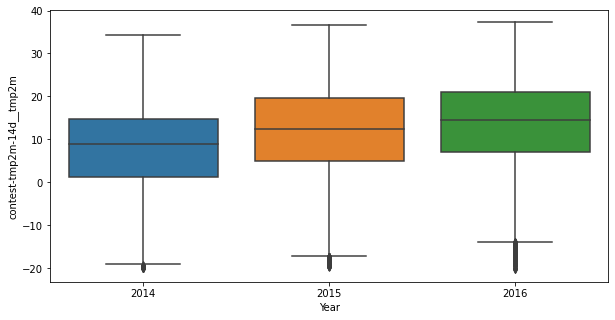

In [24]:
fig, ax = plt.subplots(figsize=(10,5))
sns.boxplot(x='Year', y='contest-tmp2m-14d__tmp2m', data=train, ax=ax)

In [25]:
month_avg = train.groupby(['Month'])['contest-tmp2m-14d__tmp2m'].mean()
month_avg

Month
1      1.356244
2      4.209260
3      8.846492
4     11.846632
5     15.853336
6     22.103172
7     23.245233
8     21.630298
9     17.844833
10    12.167696
11     2.922867
12    -0.105181
Name: contest-tmp2m-14d__tmp2m, dtype: float64

<AxesSubplot:xlabel='Month', ylabel='contest-tmp2m-14d__tmp2m'>

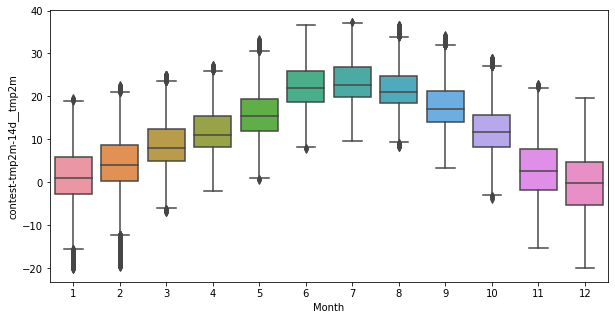

In [26]:
fig, ax = plt.subplots(figsize=(10,5))
sns.boxplot(x='Month', y='contest-tmp2m-14d__tmp2m', data=train, ax=ax)

<AxesSubplot:xlabel='startdate', ylabel='contest-tmp2m-14d__tmp2m'>

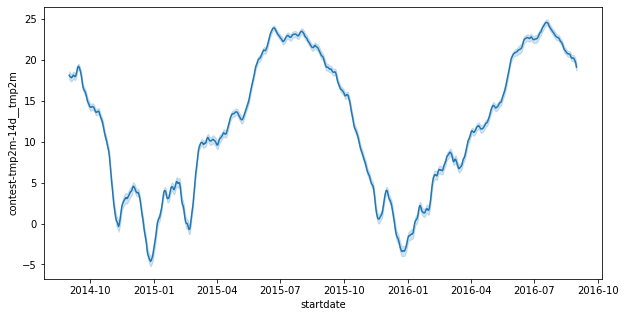

In [27]:
fig, ax = plt.subplots(figsize=(10,5))
sns.lineplot(x='startdate', y='contest-tmp2m-14d__tmp2m', data=train, ax=ax)

<AxesSubplot:xlabel='elevation__elevation', ylabel='contest-tmp2m-14d__tmp2m'>

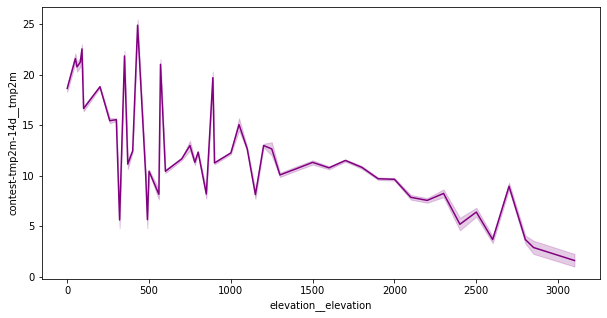

In [28]:
fig, ax = plt.subplots(figsize=(10,5))
sns.lineplot(x='elevation__elevation', y='contest-tmp2m-14d__tmp2m', data=train, ax=ax,color='purple')

<AxesSubplot:xlabel='contest-precip-14d__precip', ylabel='contest-tmp2m-14d__tmp2m'>

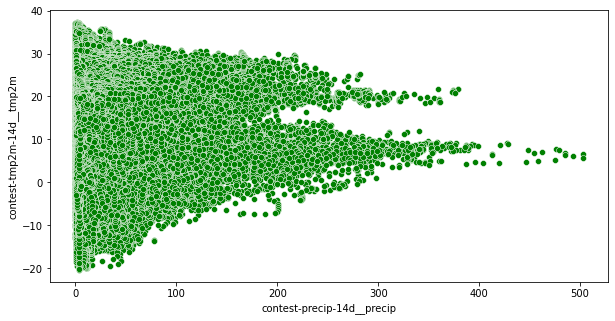

In [29]:
fig, ax = plt.subplots(figsize=(10,5))
sns.scatterplot(x='contest-precip-14d__precip', y='contest-tmp2m-14d__tmp2m', data=train, ax=ax, color='green')

In [30]:
train['climateregions__climateregion']

0         BSh
1         BSh
2         BSh
3         BSh
4         BSh
         ... 
375729    Dfb
375730    Dfb
375731    Dfb
375732    Dfb
375733    Dfb
Name: climateregions__climateregion, Length: 375734, dtype: object

<AxesSubplot:xlabel='climateregions__climateregion', ylabel='contest-tmp2m-14d__tmp2m'>

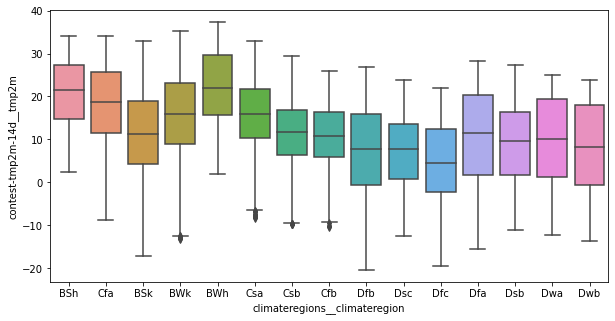

In [31]:
fig, ax = plt.subplots(figsize=(10,5))
sns.boxplot(x='climateregions__climateregion', y='contest-tmp2m-14d__tmp2m', data=train, ax=ax)

<AxesSubplot:xlabel='climateregions__climateregion', ylabel='Count'>

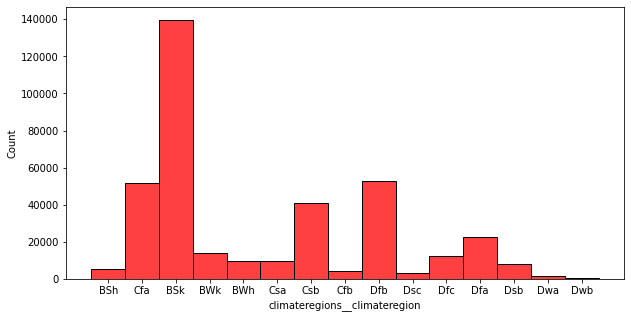

In [32]:
fig, ax = plt.subplots(figsize=(10,5))
sns.histplot(x='climateregions__climateregion', data=train, ax=ax, color='red' )

<AxesSubplot:xlabel='contest-precip-14d__precip', ylabel='contest-tmp2m-14d__tmp2m'>

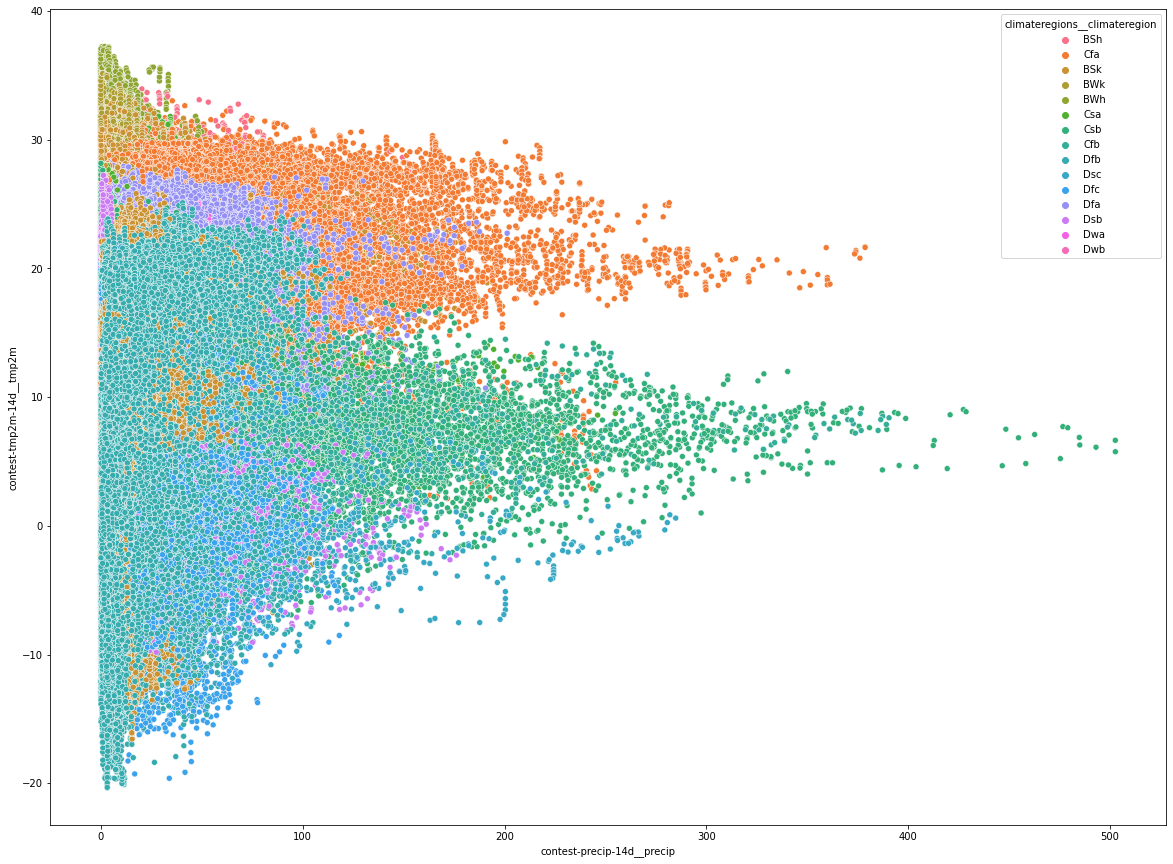

In [33]:
fig, ax = plt.subplots(figsize=(20,15))
sns.scatterplot(x='contest-precip-14d__precip', y='contest-tmp2m-14d__tmp2m', hue='climateregions__climateregion', data=train, ax=ax)

In [36]:

X = train.drop('contest-tmp2m-14d__tmp2m', axis = 1)
y = train['contest-tmp2m-14d__tmp2m']

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [38]:
model = LinearRegression()

In [39]:
# Select only columns with non-string data type
df_numeric = train.select_dtypes(exclude=['object'])

# Fit linear regression model
X = df_numeric.drop('contest-tmp2m-14d__tmp2m', axis=1)
y = df_numeric['contest-tmp2m-14d__tmp2m']

In [40]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [89]:
# Drop columns 'index','lat','lon','startdate'
train_data = train.drop(['index','lat','lon','startdate','loc'], axis=1)
test_data = test.drop(['index','lat','lon','startdate','loc'], axis=1)

In [90]:
train_data

,contest-pevpr-sfc-gauss-14d__pevpr,nmme0-tmp2m-34w__cancm30,nmme0-tmp2m-34w__cancm40,nmme0-tmp2m-34w__ccsm30,nmme0-tmp2m-34w__ccsm40,nmme0-tmp2m-34w__cfsv20,nmme0-tmp2m-34w__gfdlflora0,nmme0-tmp2m-34w__gfdlflorb0,nmme0-tmp2m-34w__gfdl0,nmme0-tmp2m-34w__nasa0,...,wind-vwnd-925-2010-13,wind-vwnd-925-2010-14,wind-vwnd-925-2010-15,wind-vwnd-925-2010-16,wind-vwnd-925-2010-17,wind-vwnd-925-2010-18,wind-vwnd-925-2010-19,wind-vwnd-925-2010-20,Year,Month
1970-01-01 00:00:00.000000000,237.00,29.02,31.64,29.57,30.73,29.71,31.52,31.68,30.56,29.66,...,8.32,9.56,-2.03,48.13,28.09,-13.50,11.90,4.58,2014,9
1970-01-01 00:00:00.000000001,228.90,29.02,31.64,29.57,30.73,29.71,31.52,31.68,30.56,29.66,...,8.77,21.17,4.44,48.60,27.41,-23.77,15.44,3.42,2014,9
1970-01-01 00:00:00.000000002,220.69,29.02,31.64,29.57,30.73,29.71,31.52,31.68,30.56,29.66,...,6.99,32.16,5.01,48.53,19.21,-33.16,15.11,4.82,2014,9
1970-01-01 00:00:00.000000003,225.28,29.02,31.64,29.57,30.73,29.71,31.52,31.68,30.56,29.66,...,6.17,39.66,-1.41,50.59,8.29,-37.22,18.24,9.74,2014,9
1970-01-01 00:00:00.000000004,237.24,29.02,31.64,29.57,30.73,29.71,31.52,31.68,30.56,29.66,...,7.47,38.62,-5.21,54.73,-2.58,-42.30,21.91,10.95,2014,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1970-01-01 00:00:00.000375729,312.05,23.13,27.20,20.25,24.43,18.35,23.35,23.59,19.43,23.23,...,-3.09,6.93,-16.69,16.98,-13.85,50.25,-31.33,0.77,2016,8
1970-01-01 00:00:00.000375730,305.82,23.13,27.20,20.25,24.43,18.35,23.35,23.59,19.43,23.23,...,-13.55,13.36,-15.96,20.45,-16.36,51.65,-30.73,10.10,2016,8
1970-01-01 00:00:00.000375731,311.62,23.13,27.20,20.25,24.43,18.35,23.35,23.59,19.43,23.23,...,-23.93,22.62,-16.71,20.28,-15.48,48.58,-18.74,9.28,2016,8
1970-01-01 00:00:00.000375732,304.54,23.13,27.20,20.25,24.43,18.35,23.35,23.59,19.43,23.23,...,-33.55,32.06,-16.07,16.60,-20.61,39.23,-16.26,-0.22,2016,8


In [91]:
train_data.columns

Index(['contest-pevpr-sfc-gauss-14d__pevpr', 'nmme0-tmp2m-34w__cancm30',
       'nmme0-tmp2m-34w__cancm40', 'nmme0-tmp2m-34w__ccsm30',
       'nmme0-tmp2m-34w__ccsm40', 'nmme0-tmp2m-34w__cfsv20',
       'nmme0-tmp2m-34w__gfdlflora0', 'nmme0-tmp2m-34w__gfdlflorb0',
       'nmme0-tmp2m-34w__gfdl0', 'nmme0-tmp2m-34w__nasa0',
       ...
       'wind-vwnd-925-2010-13', 'wind-vwnd-925-2010-14',
       'wind-vwnd-925-2010-15', 'wind-vwnd-925-2010-16',
       'wind-vwnd-925-2010-17', 'wind-vwnd-925-2010-18',
       'wind-vwnd-925-2010-19', 'wind-vwnd-925-2010-20', 'Year', 'Month'],
      dtype='object', length=244)

In [92]:
test_data.columns

Index(['contest-pevpr-sfc-gauss-14d__pevpr', 'nmme0-tmp2m-34w__cancm30',
       'nmme0-tmp2m-34w__cancm40', 'nmme0-tmp2m-34w__ccsm30',
       'nmme0-tmp2m-34w__ccsm40', 'nmme0-tmp2m-34w__cfsv20',
       'nmme0-tmp2m-34w__gfdlflora0', 'nmme0-tmp2m-34w__gfdlflorb0',
       'nmme0-tmp2m-34w__gfdl0', 'nmme0-tmp2m-34w__nasa0',
       ...
       'wind-vwnd-925-2010-13', 'wind-vwnd-925-2010-14',
       'wind-vwnd-925-2010-15', 'wind-vwnd-925-2010-16',
       'wind-vwnd-925-2010-17', 'wind-vwnd-925-2010-18',
       'wind-vwnd-925-2010-19', 'wind-vwnd-925-2010-20', 'Year', 'Month'],
      dtype='object', length=243)

In [93]:
corr_matrix = train_data.corr()
cor_df = corr_matrix[corr_matrix['contest-tmp2m-14d__tmp2m']>0.75]
cor_df['contest-tmp2m-14d__tmp2m'].sort_values(ascending=False)

contest-tmp2m-14d__tmp2m               1.000000
nmme-tmp2m-56w__cfsv2                  0.954668
nmme-tmp2m-34w__cfsv2                  0.954483
nmme-tmp2m-56w__nmmemean               0.950865
nmme-tmp2m-34w__nmmemean               0.950187
nmme-tmp2m-56w__gfdlflora              0.949846
nmme-tmp2m-34w__gfdlflorb              0.949346
nmme-tmp2m-56w__gfdlflorb              0.949016
nmme-tmp2m-34w__gfdlflora              0.947379
nmme-tmp2m-56w__ccsm4                  0.944435
nmme-tmp2m-34w__ccsm4                  0.943234
nmme-tmp2m-56w__nasa                   0.941429
nmme-tmp2m-34w__nasa                   0.940128
nmme-tmp2m-56w__gfdl                   0.937179
nmme-tmp2m-34w__gfdl                   0.936684
nmme-tmp2m-34w__cancm3                 0.931658
nmme-tmp2m-56w__cancm3                 0.930164
nmme-tmp2m-34w__cancm4                 0.928570
nmme-tmp2m-56w__cancm4                 0.927753
nmme-tmp2m-56w__ccsm3                  0.911711
contest-wind-h100-14d__wind-hgt-100    0

In [94]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [95]:
le = preprocessing.LabelEncoder()
# le.fit(train_df['climateregions__climateregion'])
train_data['climateregions__climateregion'] = le.fit_transform(train_data['climateregions__climateregion'])
test_data['climateregions__climateregion'] = le.transform(test_data['climateregions__climateregion'])

In [65]:
#Response variable
Y = train_data['contest-tmp2m-14d__tmp2m']

#Predictors
X = train_data.drop('contest-tmp2m-14d__tmp2m', axis = 1)

In [66]:
X.shape

(375734, 243)

In [68]:
test_data.shape

(31354, 243)

In [ ]:
ohe = OneHotEncoder()
train_encoded = ohe.fit_transform(train[['climateregions__climateregion']])

In [81]:
#Linear Regression Model
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

lm = make_pipeline(StandardScaler(),LinearRegression())

lm.fit(X,Y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [82]:
model = LinearRegression()


#fit regression model
model.fit(X, Y)

#display regression coefficients and R-squared value of model

print(model.intercept_, model.coef_, model.score(X, Y))

884.743344487528 [-1.12491665e-03  1.56447614e-01 -1.75992630e-01  1.36245684e-01
  1.02511919e-01  9.13089016e-02  1.86346679e-01 -6.90608275e-02
  1.27624826e-01  1.83087730e-01 -7.34233944e-01  2.55393253e-03
 -2.45069296e-01  3.42041332e-02 -2.31039176e-02 -1.85699773e-02
  1.09355766e-01 -1.98881679e-01 -2.76644023e-02  2.52764113e-01
 -1.20749713e-01  2.24103519e-01 -4.48856201e-02 -5.70156862e-02
 -8.06199090e-02 -6.16402536e-02 -5.58383604e-02 -7.62561714e-02
 -6.72246188e-02 -5.75876677e-02 -6.83886439e-02 -5.87583647e-02
  5.86129904e-01 -4.85800594e-04  1.75660066e-02  1.37271019e-02
  1.72702221e-02  1.71793021e-02  1.63938226e-02  9.16673585e-03
  2.49014251e-02  1.30509881e-02  1.11209947e-02 -1.35296667e-01
  4.05838714e-02  2.40601575e-02  3.65435323e-02  3.87266828e-02
  2.54224455e-02  3.32024480e-02  3.69939536e-02  2.57440035e-02
  2.85947322e-02 -2.89460420e-01 -7.75258233e-03  1.79718524e-01
  5.67738126e-04  1.03084786e-02  4.74831714e-03 -1.01824921e-02
  8.9978